# Introdução à Data Science e Machine Learning - Data ICMC-USP

## Prática Aula 02 - Clustering

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Aproveite o material!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Compressão de áudio - Clustering

### Introdução:

Você sabe como um microfone captura sons?

Sons são basicamente perturbações no ar. Essas perturbações fazem com que o diafragma do microfone vibre, movendo uma bobina perto de um imã. Conforme a bobina se move para frente e para trás através do campo magnético, uma corrente elétrica flui através dela e isso é o que chega ao computador.

Esse sinal elétrico analógico precisa ser transformado em um sinal digital para ser interpretado pelo computador, ou seja, o sinal contínuo é discretizado em diversos pontos ao longo da curva.

<img src="imgs_02/sampling.png" style="width: 400px"/>

Ao final desse processo temos apenas uma sequencia de números em relação ao tempo. Quanto mais bits temos para representar cada número, mais fiel conseguimos representar esse sinal analógico através de um sinal digital.

<img src="imgs_02/1bit_sampling.png" style="width: 400px"/>
<img src="imgs_02/2bits_sampling.png" style="width: 400px"/>
<img src="imgs_02/4bits_sampling.png" style="width: 400px"/>
<img src="imgs_02/8bits_sampling.png" style="width: 400px"/>

### Proposta:
Gravar um áudio com encoding de 8bits e clusterizar amplitudes próximas atribuindo a todas elas o valor do centróide do cluster (por exemplo [...,126,127,125,128,129,...] resultaria em [...,127,127,127,127,127,...]).

Dessa forma se fossem definidos apenas 16 clusters, por exemplo, o sinal teria apenas 16 possibilidades de amplitude, deixando-o bem mais quadrado e com menos qualidade, porém com uma capacidade de compressão muito maior, já que são necessários menos bits para a representação dessas possibilidades.

### Instruções

#### 1-) Baixe e instale o [Audacity](https://www.audacityteam.org/download/)
#### 2-) Dentro do Audacity grave um áudio de alguns segundos, com a configuração "1 (Mono) Recording Channel".
#### 3-) Clique em File > Export > Export Audio...
#### 4-)  
     - Save as type: Other uncompressed files
     - Header: RAW (header-less)
     - Encoding: Unsigned 8-bit PCM
     - OBS: Salve no mesmo diretório/pasta que este notebook

#### 5-) Lendo o áudio como uma sequencia números

In [2]:
audio = []

## Insira o nome do arquivo do áudio gravado como filename (atente-se ao .raw no final)
filename = "audio_02.raw"

with open(filename, "rb") as fp:
    while True:
        byte = fp.read(1)
        if not byte:
            break
        audio.append(int.from_bytes(byte, "big"))

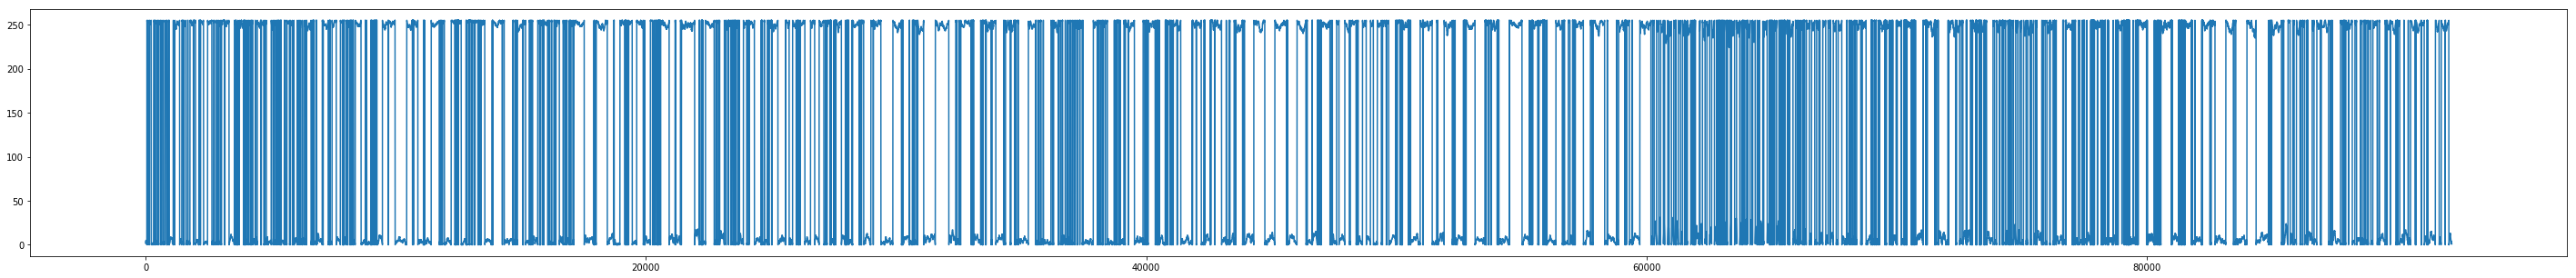

In [4]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote essa sequência de números (áudio)                 #
#  - Sugestão: Redimensione a imagem com                     #
#    f = plt.figure(figsize=(50,5)), para que forme uma onda #
#    sonora nítida                                           #
##############################################################

plt.figure(figsize=(50,5))
plt.plot(audio)

#### 6-) Pré-processando os dados

In [19]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Converta a lista para um numpy array.                   #
#  - Quantas amostras e quantas features tem os dados?       #
#  - Faça uma transformação nesse array para que os dados    # 
#    faça mais sentido (Dica: np.reshape).                   #
#  - Escreva por que foi necessário fazer essa transformação #   
##############################################################

# É necessário fazer o reshape para que seja possível aplicar o kmeans. Sem essa etapa, gera o seguinte erro:
# "Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) 
# if it contains a single sample" 
# Como temos apenas uma feature de áudio o reshape será (1,-1). Cada trecho do áudio é uma amostra de uma mesma feature

audn = np.zeros(len(audio))
for i in range(len(audio)):
    audn[i] = audio[i]
print(audn)
print(audn.shape)

raudn = audn.reshape(-1,1)
print(raudn)
print(raudn.shape)

[2. 3. 3. ... 1. 1. 1.]
(92187,)
[[2.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]
(92187, 1)


#### 6-) Clusterizando

In [26]:
###############################################################
#                       PREENCHA AQUI:                          #
#  - Instancie um KMeans na variável kmeans passando o número   #   
#    de clusters para o parâmetro n_clusters.                   #
#  - Repare que quanto menor o número de clusters, mais         #
#    quadrado será seu sinal.                                   #
#  - Preveja o índice de cluster para cada dado retornando      #
#    para a variável labels.                                    #
#  - Obtenha os centroids (através do atributo cluster_centers_)#
#    de kmeans retornando para a variável centroids.            #
#################################################################

kmeans = KMeans(n_clusters = 32)
labels = kmeans.fit_predict(raudn)
centroids = kmeans.cluster_centers_

print(labels,'\n', centroids)

[14 15 15 ...  6  6  6] 
 [[ 2.48000000e+02]
 [ 4.00000000e+00]
 [ 2.53000000e+02]
 [ 2.18905660e+01]
 [ 2.39091346e+02]
 [ 1.00000000e+01]
 [ 1.00000000e+00]
 [ 2.43581163e+02]
 [ 7.00000000e+00]
 [ 1.38460775e+01]
 [ 2.55000000e+02]
 [ 2.50000000e+02]
 [ 2.46000000e+02]
 [ 2.29156250e+02]
 [ 2.00000000e+00]
 [ 3.00000000e+00]
 [-9.72022463e-12]
 [ 2.54000000e+02]
 [ 5.00000000e+00]
 [ 2.52000000e+02]
 [ 2.51000000e+02]
 [ 2.49000000e+02]
 [ 2.41597601e+02]
 [ 6.00000000e+00]
 [ 1.14071217e+01]
 [ 1.69668050e+01]
 [ 2.71741935e+01]
 [ 2.47000000e+02]
 [ 8.00000000e+00]
 [ 2.35935780e+02]
 [ 2.45000000e+02]
 [ 9.00000000e+00]]


#### 7-) Atribuindo cada ponto ao centróide do cluster e salvando o novo áudio

In [27]:
output = []
for label in labels:
    output.append(int(centroids[label]))

out_file = open("audio_output_02_32clus.raw", 'wb')
out_file.write(bytearray(output))

92187

#### 8-) Abra o áudio no Audacity e ouça a influencia da clusterização.
        - File > Import > Raw Data...
        - Encoding: Unsigned 8-bit PCM
        - Byte order: Little-endian
        - Channels: 1 Channel (Mono)

#### 9) Mesmo com poucos clusters, o áudio ainda é audível?

#### 10-) Compressão

A princípio, independente do número de clusters utilizado, o output.raw sempre terá o mesmo tamanho que o audio original, afinal, possui sempre a mesma quantidade de números representados pelo mesmo número de bits (8).

Porém, a capacidade de compressão aumenta quanto menos clusters temos. Com menos clusters precisamos representar menos números.

No terminal do linux:

    Instale o bzip2:
        sudo apt install bzip2

    Para ver o tamanho do arquivo após compressão, execute o seguinte comando:
        bzip2 -c output.raw | wc -c
        
Repita esses passos para diferentes números de clusters e veja a relação com a capacidade de compressão.

Para entender um pouco melhor o que está acontecendo, procure por: Burrows–Wheeler transform (algoritmo de compressão utilizado pelo bzip2).

#### Referências:
    
- [ML4U (Rodrigo Mello)](https://www.youtube.com/watch?v=m09fYk0-zmA)
- [Digital Audio: the real meaning of 8-bit music](https://medium.com/@harmonia.global/digital-audio-the-real-meaning-of-8-bit-music-1be5fc8ab2b1)